In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
IMAGE_SIZE = [224, 224]

In [8]:
#Give dataset path
train_path = 'main dataset/train'
test_path = 'main dataset/test'

In [9]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [10]:
for layer in vgg.layers:
    layer.trainable = False

In [11]:
folders = glob('main dataset/train/*')
print(len(folders))

2


In [12]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [13]:
from tensorflow.keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [15]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [16]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5984 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1496 images belonging to 2 classes.


In [23]:
from timeit import default_timer as timer
start = timer()


 

history = model.fit_generator(train_set,                         
                         epochs = 10,
                         validation_data = test_set
                         )

end = timer() 
print('Training Completed!')
print("Time Elapsed in seconds",  (end - start))

Epoch 1/10
187/187 [==============================] - 103s 553ms/step - loss: 2.0715 - accuracy: 0.8453 - val_loss: 3.6550 - val_accuracy: 0.7363
Epoch 2/10
187/187 [==============================] - 81s 432ms/step - loss: 1.7156 - accuracy: 0.8727 - val_loss: 3.3871 - val_accuracy: 0.7646
Epoch 3/10
187/187 [==============================] - 77s 409ms/step - loss: 1.6188 - accuracy: 0.8805 - val_loss: 3.6642 - val_accuracy: 0.7422
Epoch 4/10
187/187 [==============================] - 77s 412ms/step - loss: 1.7509 - accuracy: 0.8730 - val_loss: 4.4491 - val_accuracy: 0.6982
Epoch 5/10
187/187 [==============================] - 76s 404ms/step - loss: 1.7984 - accuracy: 0.8728 - val_loss: 2.8636 - val_accuracy: 0.7969
Epoch 6/10
187/187 [==============================] - 76s 404ms/step - loss: 1.4790 - accuracy: 0.8934 - val_loss: 2.9951 - val_accuracy: 0.7891
Epoch 7/10
187/187 [==============================] - 76s 404ms/step - loss: 1.5593 - accuracy: 0.8889 - val_loss: 3.2747 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


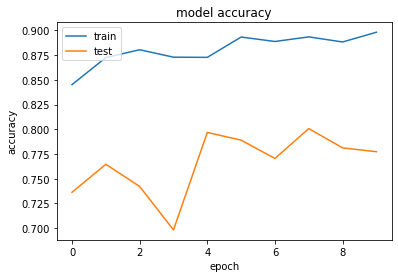

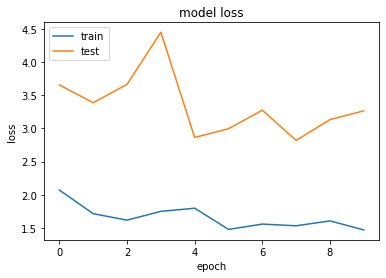

In [24]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')



plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# save model and architecture to single file
model.save('myVGG16.h5')
model.summary()

print("Saved model to disk")

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [44]:
import tensorflow
import numpy 
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
import imutils
import cv2

In [45]:
# load the pre-trained CNN from disk
from tensorflow.keras.models import load_model
model = load_model('myVGG16.h5', compile = True)

[[0. 1.]]
1


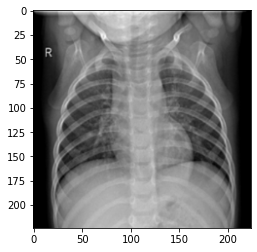

In [54]:
image = cv2.imread('main dataset/train/normal/Normal-625.png')
image = cv2.resize(image, (224, 224))
plt.imshow(image)
image = np.expand_dims(image, axis=0)

preds = model.predict(image)
print(preds)
i = np.argmax(preds[0])
print(i)

[[1. 0.]]
0


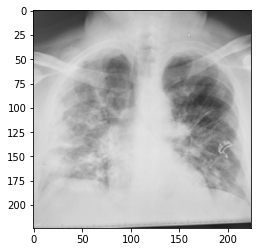

In [55]:
image = cv2.imread('main dataset/train/covid/COVID-625.png')
image = cv2.resize(image, (224, 224))
plt.imshow(image)
image = np.expand_dims(image, axis=0)

preds = model.predict(image)
print(preds)
i = np.argmax(preds[0])
print(i)